### NOTE FOR LUCA

**Remember to set/remove metadata as:**
{
  "nbsphinx": "hidden"
}

to enable/disable solutions view

# Scientific Programmming 13/02/2019

## Before you start
**Please write one single python script for the lab part and one text file with the answers to the theoretical questions.**

**IMPORTANT: Add your name and ID (matricola) on top of the .py and text files!**


## Theory

**Please write the solution in a text file**.

### Exercise 1:

Let L a list of size n, and i and j two indeces. Return the 
computational complexity of function fun() with respect to n.

```
def fun(L, i, j):
     # j-i+1 is the number of elements
     # between index i and index j (both included)
     if j-i+1 <= 3:
         # Compute their minimum
         return min(L[i:j+1])
     else:
        onethird = (j-i+1)//3
        res1 = fun(L,i, i+onethird)
        res2 = fun(L,i+onethird+1, i+2*onethird)
        res3 = fun(L,i+2*onethird+1, j)
        return min(res1,res2,res3)
```


## Practical part


## Exercise 1:

The file [test_genes.tsv](file_samples/test_genes.tsv) is a tab separated file containing the following information regarding genes:

```
ScaffoldID	feature	StartPos	EndPos	GeneID
s159888	gene	48555	49286	gene00001
s159888	mRNA	48555	49286	gene00001
s159888	start_codon	48555	48557	gene00001
s159888	CDS	48555	48653	gene00001
...
```

As the header says, the first column is the scaffold where the gene os located, feature represents the information specified in the line (e.g. gene, mRNA, start_codon,...) , StartPos and EndPos are the starting and ending position of the feature and GeneID is the identifier of the gene . 

The file [test_seqs.fasta](file_samples/test_seqs.fasta) is a fasta file with the sequence of some of the scaffolds contained in the test_genes.tsv file.

Read the file in input and store it in a suitable data structure ```data``` (hint: pandas?) then write the following methods:

1. ```computestats(data)``` gets the data structure loaded and prints the total number of scaffolds, geneIDs and features. The method should also print the first ten genes. For each feature (i.e. second column) print the average length of the feature (with 3 decimal places of precision); 


2. ```scaffInfo(data, scaffold, start, end, kind='bar')``` given the input data, a scaffold, a start postion and an end position,  prints how many features are **entirely** contained in the closed interval [start,end] and plots the counts of the different number of features in the interval. An optional parameter ```kind``` can be specified to control the type of plot (possible values: bar, pie). The default of this optional parameter is ```bar```;


3. ```getInfo(data, geneID, sequenceFile)``` given the input data, a geneID and a fasta file containing sequences, the function prints all the features belonging to geneID (if geneID exists and the corresponding scaffold is in the sequenceFile, an error message otherwise) and the sequence of the start_codon, all exons and end_codon (**note that positions in the test_genes.tsv file are 1-based, which means that the first base is considered in position 1**). **See example below to see how the output should look like.**


After loading the data, calling 

```
dataFile = "test_genes.tsv"
seqFile = "test_seqs.fasta"

data = pd.read_csv(dataFile,
                     sep="\t",  header = 0)
    

computestats(data)
print("\n")
scaffInfo(data, "s160692",1,300000)
scaffInfo(data, "s160448",1,125000, "pie")
scaffInfo(data, "s160551",1,50000)
scaffInfo(data, "s163228", 1,10000)
print("\n")
getInfo(data, "gene00001" ,seqFile)
print("\n")
getInfo(data, "gene00607" ,seqFile)
print("\n")
getInfo(data, "gene72" ,seqFile)
```

should return 

```
The file contains 9982 features
Belonging to 481 scaffolds and 622 genes.
First 10 genes are:
	gene00044
	gene00556
	gene00512
	gene00323
	gene00124
	gene00541
	gene00553
	gene00430
	gene00588
	gene00382
Overall average feature length: 1193.051 bps

Feature CDS has avg. length 338.342 bps
Feature exon has avg. length 338.342 bps
Feature gene has avg. length 5644.326 bps
Feature initial has avg. length 357.402 bps
Feature internal has avg. length 222.450 bps
Feature intron has avg. length 2007.303 bps
Feature mRNA has avg. length 5644.326 bps
Feature start_codon has avg. length 3.000 bps
Feature stop_codon has avg. length 3.000 bps
Feature terminal has avg. length 465.545 bps

86 total features are in s160692 in [1,300000]
```
![](img/examFeb19/img1.png)

```
11 total features are in s160448 in [1,125000]
```

![](img/examFeb19/img2.png)


```
15 total features are in s160551 in [1,50000]
```

![](img/examFeb19/img3.png)

```
0 total features are in s163228 in [1,10000]
Nothing to plot for s163228:[1,10000]


Features of gene "gene00001"
gene on s159888 in position [48555,49286]
mRNA on s159888 in position [48555,49286]
start_codon on s159888 in position [48555,48557]
	Sequence: ATG
CDS on s159888 in position [48555,48653]
exon on s159888 in position [48555,48653]
	Sequence: ATGGAGAAGGGCGATACTATATCTACATACCTGAACAAGCTCACCACCTGTATAGATGAGCTTAGTAGTGTGGGAATAACTACTGTTGATGATGATATG
initial on s159888 in position [48555,48653]
intron on s159888 in position [48654,48764]
CDS on s159888 in position [48765,49286]
exon on s159888 in position [48765,49286]
	Sequence: GAGGATATCAGGAGGAGCACACGAGATGGTTCTTCATCCAAGAATGATGATGAAGAAAATCTGGCCTTAGCAAGTAAGGCAAGGAAAGGGAAAGGTAAGGCTTCCCATTCCAAATCGAATTCTTCTCATGGAGGGAAGAAGGTTGACAAGTCTAAAGTGAGATGCTTTAATTGTCACGACATGGGACATTATGCAACTAACTTCCCATTGAAGAAGTCCAAGAAGGGATCCTCGAAAGGATCACAAGGTGAGGCATTAGCCTCTCAGTTTGAAATGGACTTTTCCCTCATCGCATGCATGGTTTCATCGATGGTGGGTTGTGTTTGGTACCTTGACAGCGGAGCCTCATTCCACATGACCGGCAATAAAAGTTTATTCAGTACCTTGGAGGAGAAAGACCTTAAGATGCACATAGAAATGGGTGACAACAGAAAGTACAGTGTTTCAAGAGTGGGCACAGTTGCTTTTCAGAGGGAACACAGATCTCCTCATACCTTGATAGATGTGAAGTATGTGCCTTGA
terminal on s159888 in position [48765,49286]
stop_codon on s159888 in position [49284,49286]
	Sequence: TGA


Features of gene "gene00607"
gene on s163228 in position [77187,90573]
mRNA on s163228 in position [77187,90573]
start_codon on s163228 in position [77187,77189]
 - Sequence information UNAVAILABLE
CDS on s163228 in position [77187,77465]
exon on s163228 in position [77187,77465]
 - Sequence information UNAVAILABLE
initial on s163228 in position [77187,77465]
intron on s163228 in position [77466,89710]
CDS on s163228 in position [89711,89768]
exon on s163228 in position [89711,89768]
 - Sequence information UNAVAILABLE
internal on s163228 in position [89711,89768]
intron on s163228 in position [89769,90073]
CDS on s163228 in position [90074,90573]
exon on s163228 in position [90074,90573]
 - Sequence information UNAVAILABLE
terminal on s163228 in position [90074,90573]
stop_codon on s163228 in position [90571,90573]
 - Sequence information UNAVAILABLE


No information available for gene "gene72"
```




## Exercise 2:

Recall directed graphs as adjacency matrices (implemented in the included ```DiGraphAsAdjacencyMatrix```).

1. Write a method ```getInConnected(self, mynode)``` that returns the list of nodes that outlink to the node ```mynode``` if ```mynode``` exists in the set of nodes, it should print an error message and return None otherwise.

2. Write a method ```getTopConnected(self, connectionType)``` that returns the node with the highest number of connections of the specified type (and the corresponding connections count). Connection type can be ```incoming``` to get the node with the highest number of incoming edges, ```outgoing``` to get the node with the highest number of outgoing edges or ```both``` to get the node that has the highest number of connections (regardless if they are outgoing or incoming). 

3. Write a **recursive method** ```countPathsRec(self, startNode, endNode, K)``` that given a starting node ```startNode``` and a ending node ```endNode``` counts how many paths of length exactly equal to $K$ connect the two (following the right orientation of edges).

To solve this problem consider that the base cases are:

a. if startNode == endNode and K = 0 there is one path connecting the two;

b. if startNode outlinks to endNode and K = 1, then there is one path;

c. if K <0 there are no possible paths;

The recursive method should move from start node to all its adjacent nodes and recursively count how many paths of length K-1 exist from that point on towards endNode.

4. Modify the previous method to return also all the found paths. Hint: add a parameter ```path``` to the countPathsRec method.

Test the code with the following graph:

![](img/testgraph_feb.png)


that can be implemented with:

```
G = DiGraphAsAdjacencyMatrix()
    for i in range(11):
        n = "Node{}".format(i+1)
        G.insertNode(n)

G.insertEdge("Node1","Node2", 1)
G.insertEdge("Node2", "Node3", 1)
G.insertEdge("Node2","Node4", 1)
G.insertEdge("Node2" ,"Node5", 1)
G.insertEdge("Node3" ,"Node5", 1)
G.insertEdge("Node9" ,"Node5", 1)
G.insertEdge("Node4","Node6", 1)
G.insertEdge("Node6","Node7", 1)
G.insertEdge("Node7","Node5", 1)
G.insertEdge("Node7" ,"Node4", 1)
G.insertEdge("Node4" ,"Node7", 1)
G.insertEdge("Node8" ,"Node3", 1)
G.insertEdge("Node8" ,"Node2", 1)
G.insertEdge("Node1" ,"Node9", 1)
G.insertEdge("Node9" ,"Node1", 1)
G.insertEdge("Node9" ,"Node10", 1)
G.insertEdge("Node5" ,"Node10", 1)
G.insertEdge("Node5" ,"Node9", 1)
G.insertEdge("Node6" ,"Node9", 1)
G.insertEdge("Node7" ,"Node9", 1)
G.insertEdge("Node9" ,"Node8", 1)
G.insertEdge("Node9" ,"Node3", 1)
G.insertEdge("Node8" ,"Node1", 1)
G.insertEdge("Node10" ,"Node3", 1)
G.insertEdge("Node11" ,"Node10", 1)

```

Calling

```
print(G)

n="Node3"
print("{} has incoming links from: {}".format(n, G.getInConnected(n)))
n="Node7"
print("{} has incoming links from: {}".format(n, G.getInConnected(n)))
n="Node9"
print("{} has incoming links from: {}".format(n, G.getInConnected(n)))
n="Node472"
print("{} has incoming links from: {}".format(n, G.getInConnected(n)))
n="Node11"
print("{} has incoming links from: {}".format(n, G.getInConnected(n)))
print("\n")
TI = G.getTopConnected("incoming")
print("Top connected node(s) (incoming) is: {} ({} tot connections)".format(TI[0],TI[1]))
TO = G.getTopConnected("outgoing")
print("Top connected node(s) (outgoing) is: {} ({} tot connections)".format(TO[0],TO[1]))
TB = G.getTopConnected("both")
print("Top connected node(s) is: {} ({} tot connections)".format(TB[0],TB[1]))

print("\n")
n1 = "Node1"
n2 = "Node4"
n = 4
print("{} paths of length {} between node {} and {}".format(G.countPathsRec(n1,n2,n),
                                                           n, n1,n2))

n1 = "Node3"
n2 = "Node9"
n = 7
print("{} paths of length {} between node {} and {}".format(G.countPathsRec(n1,n2,n),
                                                           n, n1,n2))
```

should return:

```
Node3 has incoming links from: ['Node2', 'Node8', 'Node9', 'Node10']
Node7 has incoming links from: ['Node4', 'Node6']
Node9 has incoming links from: ['Node1', 'Node5', 'Node6', 'Node7']
Error. Node "Node472" does not exist
Node472 has incoming links from: None
Node11 has incoming links from: []


Top connected node(s) (incoming) is: Node3,Node5,Node9 (4 tot connections)
Top connected node(s) (outgoing) is: Node9 (5 tot connections)
Top connected node(s) is: Node9 (9 tot connections)


3 paths of length 4 between node Node1 and Node4
18 paths of length 7 between node Node3 and Node9
12 paths of length 5 between node Node4 and Node10
```

with the paths:

```
PATH: Node1 --> Node2 --> Node4 --> Node7 --> Node4
PATH: Node1 --> Node9 --> Node1 --> Node2 --> Node4
PATH: Node1 --> Node9 --> Node8 --> Node2 --> Node4
3 paths of length 4 between node Node1 and Node4
PATH: Node3 --> Node5 --> Node9 --> Node1 --> Node2 --> Node3 --> Node5 --> Node9
PATH: Node3 --> Node5 --> Node9 --> Node1 --> Node2 --> Node4 --> Node6 --> Node9
PATH: Node3 --> Node5 --> Node9 --> Node1 --> Node2 --> Node4 --> Node7 --> Node9
PATH: Node3 --> Node5 --> Node9 --> Node1 --> Node9 --> Node3 --> Node5 --> Node9
PATH: Node3 --> Node5 --> Node9 --> Node1 --> Node9 --> Node8 --> Node1 --> Node9
PATH: Node3 --> Node5 --> Node9 --> Node3 --> Node5 --> Node9 --> Node1 --> Node9
PATH: Node3 --> Node5 --> Node9 --> Node3 --> Node5 --> Node9 --> Node5 --> Node9
PATH: Node3 --> Node5 --> Node9 --> Node5 --> Node9 --> Node3 --> Node5 --> Node9
PATH: Node3 --> Node5 --> Node9 --> Node5 --> Node9 --> Node8 --> Node1 --> Node9
PATH: Node3 --> Node5 --> Node9 --> Node5 --> Node10 --> Node3 --> Node5 --> Node9
PATH: Node3 --> Node5 --> Node9 --> Node8 --> Node1 --> Node2 --> Node5 --> Node9
PATH: Node3 --> Node5 --> Node9 --> Node8 --> Node1 --> Node9 --> Node1 --> Node9
PATH: Node3 --> Node5 --> Node9 --> Node8 --> Node1 --> Node9 --> Node5 --> Node9
PATH: Node3 --> Node5 --> Node9 --> Node8 --> Node2 --> Node3 --> Node5 --> Node9
PATH: Node3 --> Node5 --> Node9 --> Node8 --> Node2 --> Node4 --> Node6 --> Node9
PATH: Node3 --> Node5 --> Node9 --> Node8 --> Node2 --> Node4 --> Node7 --> Node9
PATH: Node3 --> Node5 --> Node10 --> Node3 --> Node5 --> Node9 --> Node1 --> Node9
PATH: Node3 --> Node5 --> Node10 --> Node3 --> Node5 --> Node9 --> Node5 --> Node9
18 paths of length 7 between node Node3 and Node9
PATH: Node4 --> Node6 --> Node7 --> Node5 --> Node9 --> Node10
PATH: Node4 --> Node6 --> Node7 --> Node9 --> Node5 --> Node10
PATH: Node4 --> Node6 --> Node9 --> Node1 --> Node9 --> Node10
PATH: Node4 --> Node6 --> Node9 --> Node3 --> Node5 --> Node10
PATH: Node4 --> Node6 --> Node9 --> Node5 --> Node9 --> Node10
PATH: Node4 --> Node7 --> Node4 --> Node6 --> Node9 --> Node10
PATH: Node4 --> Node7 --> Node4 --> Node7 --> Node5 --> Node10
PATH: Node4 --> Node7 --> Node4 --> Node7 --> Node9 --> Node10
PATH: Node4 --> Node7 --> Node5 --> Node9 --> Node5 --> Node10
PATH: Node4 --> Node7 --> Node9 --> Node1 --> Node9 --> Node10
PATH: Node4 --> Node7 --> Node9 --> Node3 --> Node5 --> Node10
PATH: Node4 --> Node7 --> Node9 --> Node5 --> Node9 --> Node10
12 paths of length 5 between node Node4 and Node10
```


In [2]:
"""
NAME:
SURNAME:
Matricola: 

Exercise2.py
"""


class DiGraphAsAdjacencyMatrix:
    def __init__(self):
        #would be better a set, but I need an index
        self.__nodes = list()
        self.__matrix = list()
        
    def __len__(self):
        """gets the number of nodes"""
        return len(self.__nodes)
        
    def nodes(self):
        return self.__nodes
    
    def matrix(self):
        return self.__matrix
    
    def __str__(self):
        header = "\t".join([n for n in self.__nodes])
        data = ""
        for i in range(0,len(self.__matrix)):
            data += str(self.__nodes[i]) +"\t" + "\t".join([str(x) for x in self.__matrix[i]]) + "\n"

        return "\t"+ header +"\n" + data
    
    def insertNode(self, node):
        #add the node if not there.
        if node not in self.__nodes:
            self.__nodes.append(node)
            #add a row and a column of zeros in the matrix
            if len(self.__matrix) == 0:
                #first node
                self.__matrix = [[0]]
            else:
                N = len(self.__nodes)
                for row in self.__matrix:
                    row.append(0)
                self.__matrix.append([0 for x in range(N)])
    
    def insertEdge(self, node1, node2, weight):
        i = -1
        j = -1
        if node1 in self.__nodes:
            i = self.__nodes.index(node1)
        if node2 in self.__nodes:
            j = self.__nodes.index(node2)
        if i != -1 and j != -1:
            self.__matrix[i][j] = weight
    
    def deleteEdge(self, node1,node2):
        """removing an edge means to set its
        corresponding place in the matrix to 0"""
        i = -1
        j = -1
        if node1 in self.__nodes:
            i = self.__nodes.index(node1)
        if node2 in self.__nodes:
            j = self.__nodes.index(node2)
        if i != -1 and j != -1:
            self.__matrix[i][j] = 0
    
    def deleteNode(self, node):
        """removing a node means removing
        its corresponding row and column in the matrix"""
        i = -1

        if node in self.__nodes:
            i = self.__nodes.index(node)
        #print("Removing {} at index {}".format(node, i))
        if node != -1:
            self.__matrix.pop(i)
            for row in self.__matrix:
                row.pop(i)
            self.__nodes.pop(i)
    
    
     
    def edges(self):
        """Returns all the edges in the graph as triplets"""
        ret = []
        for i in range(len(self.__nodes)):
            start = self.__nodes[i]
            for j in range(len(self.__nodes)):
                end = self.__nodes[j]
                w = self.__matrix[i][j]
                if w != 0:
                    ret.append((start, end, w))
        return ret
    
    
    def getInConnected(self, mynode):
        """returns the list of nodes that outlink to the node ```mynode```
        if ```mynode``` exists in the set of nodes, it should print an error message and
        return None otherwise
        """
        
    def getTopConnected(self, connectionType):
        """
        Returns the node with the highest number of connections of the specified type.
        (and the corresponding connections count).
        Connection type can be: 
        ```incoming``` to get the node with the highest number of incoming edges, 
        ```outgoing``` to get the node with the highest number of outgoing edges or 
        ```both``` to get the node that has the highest number of connections 
        (regardless if they are outgoing or incoming)."""        
            
            
    def countPathsRec(self, startNode, endNode, K):
        """given a starting node ```startNode``` and a ending node ```endNode``` counts 
        how many paths of length exactly equal to $K$ connect the two 
        (following the right orientation of edges).
        """
        
if __name__ == "__main__":
    G = DiGraphAsAdjacencyMatrix()
    for i in range(11):
        n = "Node{}".format(i+1)
        G.insertNode(n)

    G.insertEdge("Node1","Node2", 1)
    G.insertEdge("Node2", "Node3", 1)
    G.insertEdge("Node2","Node4", 1)
    G.insertEdge("Node2" ,"Node5", 1)
    G.insertEdge("Node3" ,"Node5", 1)
    G.insertEdge("Node9" ,"Node5", 1)
    G.insertEdge("Node4","Node6", 1)
    G.insertEdge("Node6","Node7", 1)
    G.insertEdge("Node7","Node5", 1)
    G.insertEdge("Node7" ,"Node4", 1)
    G.insertEdge("Node4" ,"Node7", 1)
    G.insertEdge("Node8" ,"Node3", 1)
    G.insertEdge("Node8" ,"Node2", 1)
    G.insertEdge("Node1" ,"Node9", 1)
    G.insertEdge("Node9" ,"Node1", 1)
    G.insertEdge("Node9" ,"Node10", 1)
    G.insertEdge("Node5" ,"Node10", 1)
    G.insertEdge("Node5" ,"Node9", 1)
    G.insertEdge("Node6" ,"Node9", 1)
    G.insertEdge("Node7" ,"Node9", 1)
    G.insertEdge("Node9" ,"Node8", 1)
    G.insertEdge("Node9" ,"Node3", 1)
    G.insertEdge("Node8" ,"Node1", 1)
    G.insertEdge("Node10" ,"Node3", 1)
    G.insertEdge("Node11" ,"Node10", 1)
        
print(G)


	Node1	Node2	Node3	Node4	Node5	Node6	Node7	Node8	Node9	Node10	Node11
Node1	0	1	0	0	0	0	0	0	1	0	0
Node2	0	0	1	1	1	0	0	0	0	0	0
Node3	0	0	0	0	1	0	0	0	0	0	0
Node4	0	0	0	0	0	1	1	0	0	0	0
Node5	0	0	0	0	0	0	0	0	1	1	0
Node6	0	0	0	0	0	0	1	0	1	0	0
Node7	0	0	0	1	1	0	0	0	1	0	0
Node8	1	1	1	0	0	0	0	0	0	0	0
Node9	1	0	1	0	1	0	0	1	0	1	0
Node10	0	0	1	0	0	0	0	0	0	0	0
Node11	0	0	0	0	0	0	0	0	0	1	0



### A possible solution: 

## Theory

Exercise 1. Solution:
$\Theta(n)$

## Practical part

The file contains 9982 features
Belonging to 481 scaffolds and 622 genes.
First 10 genes are:
	gene00044
	gene00556
	gene00512
	gene00323
	gene00124
	gene00541
	gene00553
	gene00430
	gene00588
	gene00382
Overall average feature length: 1193.051 bps

Feature CDS has avg. length 338.342 bps
Feature exon has avg. length 338.342 bps
Feature gene has avg. length 5644.326 bps
Feature initial has avg. length 357.402 bps
Feature internal has avg. length 222.450 bps
Feature intron has avg. length 2007.303 bps
Feature mRNA has avg. length 5644.326 bps
Feature start_codon has avg. length 3.000 bps
Feature stop_codon has avg. length 3.000 bps
Feature terminal has avg. length 465.545 bps


86 total features are in s160692 in [1,300000]


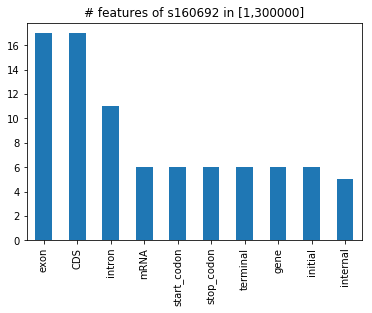

11 total features are in s160448 in [1,125000]


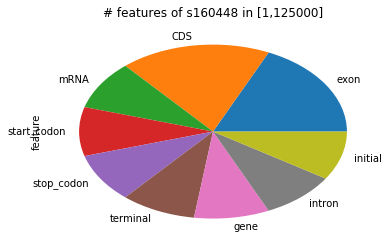

15 total features are in s160551 in [1,50000]


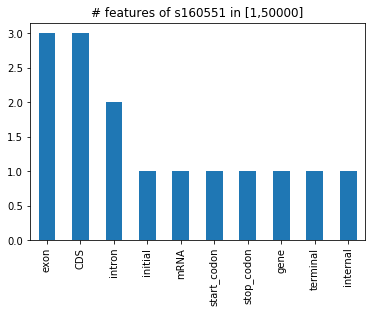

0 total features are in s163228 in [1,10000]
Nothing to plot for s163228:[1,10000]


Features of gene "gene00001"
gene on s159888 in position [48555,49286]
mRNA on s159888 in position [48555,49286]
start_codon on s159888 in position [48555,48557]
	Sequence: ATG
CDS on s159888 in position [48555,48653]
exon on s159888 in position [48555,48653]
	Sequence: ATGGAGAAGGGCGATACTATATCTACATACCTGAACAAGCTCACCACCTGTATAGATGAGCTTAGTAGTGTGGGAATAACTACTGTTGATGATGATATG
initial on s159888 in position [48555,48653]
intron on s159888 in position [48654,48764]
CDS on s159888 in position [48765,49286]
exon on s159888 in position [48765,49286]
	Sequence: GAGGATATCAGGAGGAGCACACGAGATGGTTCTTCATCCAAGAATGATGATGAAGAAAATCTGGCCTTAGCAAGTAAGGCAAGGAAAGGGAAAGGTAAGGCTTCCCATTCCAAATCGAATTCTTCTCATGGAGGGAAGAAGGTTGACAAGTCTAAAGTGAGATGCTTTAATTGTCACGACATGGGACATTATGCAACTAACTTCCCATTGAAGAAGTCCAAGAAGGGATCCTCGAAAGGATCACAAGGTGAGGCATTAGCCTCTCAGTTTGAAATGGACTTTTCCCTCATCGCATGCATGGTTTCATCGATGGTGGGTTGTGTTTGGTACCTTGACAGCGGAGCCTCATTCCACATGACCG

In [78]:
"""
NAME:
SURNAME:
Matricola: 

partA.py
"""
% reset -f 
import pandas as pd
from matplotlib import pyplot as plt
from Bio import SeqIO

def computestats(data):
    """
    gets the data structure loaded and prints the total number of scaffolds, geneIDs and features.
    The method should also print the first ten genes.
    For each feature (i.e. second column) print the average length of the feature (with 3 decimal 
    places of precision)
    """
    print("The file contains {} features".format(data.shape[0]))
    
    countsByS = data['ScaffoldID'].value_counts()
    countsByG = data['GeneID'].value_counts()
    print("Belonging to {} scaffolds and {} genes.".format(len(countsByS), len(countsByG)))
    print("First 10 genes are:")
    for gene in countsByG.head(10).index:
        print("\t{}".format(gene))
    
    data['featureLen'] = data['EndPos']-data['StartPos'] + 1
    
    lensByType = data.groupby('feature')['featureLen'].mean()
    print("Overall average feature length: {:.3f} bps\n".format(data["featureLen"].mean()))
    
    for el in lensByType.index:
        print("Feature {} has avg. length {:.3f} bps".format(el, lensByType[el]))
        

    
    
def scaffInfo(data,scaff, start, end, kind='bar'):
    """
    given the input data, a scaffold, a start postion and an end position,  
    prints how many features are **entirely** contained in the closed interval [start,end] 
    and plots the counts of the different number of features in the interval.
    An optional parameter ```kind``` can be specified to control the type of plot (possible values: bar, pie)
    """
    sFilt = data[data['ScaffoldID'] == scaff]
    tmp = sFilt[sFilt['StartPos'] >= start]
    filtFeatures = tmp[tmp['EndPos'] <= end]
    countsByType = filtFeatures['feature'].value_counts()
    print("{} total features are in {} in [{},{}]".format(len(filtFeatures), scaff, start,end))
    if len(countsByType):
        countsByType.plot(kind = kind)
        plt.title('# features of {} in [{},{}]'.format(scaff, start,end))
        plt.show()
    else:
        print("Nothing to plot for {}:[{},{}]".format(scaff, start,end))
    


def getInfo(data, geneID, sequenceFile):
    """
    given the input data, a geneID and a fasta file containing sequences, 
    the function prints all the features belonging to geneID 
    (if geneID exists and the corresponding scaffold is in the sequenceFile, an error message otherwise) 
    and the sequence of the start_codon, all exons and end_codon
    """
    filtData = data[data['GeneID'] == geneID]
    seqDict = SeqIO.to_dict(SeqIO.parse(sequenceFile, "fasta"))
    
    if len(filtData) > 0:
        print("Features of gene \"{}\"".format(geneID))
        for ind,row in filtData.iterrows():
            
            print("{} on {} in position [{},{}]".format(row[1], 
                                                        row[0], 
                                                        row[2],
                                                       row[3]))
            if row[1] == 'start_codon' or row[1] == 'stop_codon' or row[1] == 'exon':
                if row[0] in seqDict:
                    seq = seqDict[row[0]][row[2]-1:row[3]]
                    print("\tSequence: {}".format(seq.seq))
                else:
                    print(" - Sequence information UNAVAILABLE")
                
            
    else:
        print("No information available for gene \"{}\"".format(geneID))

dataFile = "file_samples/test_genes.tsv"
seqFile = "file_samples/test_seqs.fasta"

data = pd.read_csv(dataFile,
                     sep="\t",  header = 0)
    

computestats(data)
print("\n")
scaffInfo(data, "s160692",1,300000)
scaffInfo(data, "s160448",1,125000, "pie")
scaffInfo(data, "s160551",1,50000)
scaffInfo(data, "s163228", 1,10000)
print("\n")
getInfo(data, "gene00001" ,seqFile)
print("\n")
getInfo(data, "gene00607" ,seqFile)
print("\n")
getInfo(data, "gene72" ,seqFile)

    
    




In [66]:
class DiGraphAsAdjacencyMatrix:
    def __init__(self):
        #would be better a set, but I need an index
        self.__nodes = list()
        self.__matrix = list()
        
    def __len__(self):
        """gets the number of nodes"""
        return len(self.__nodes)
        
    def nodes(self):
        return self.__nodes
    
    def matrix(self):
        return self.__matrix
    
    def __str__(self):
        header = "\t".join([n for n in self.__nodes])
        data = ""
        for i in range(0,len(self.__matrix)):
            data += str(self.__nodes[i]) +"\t" + "\t".join([str(x) for x in self.__matrix[i]]) + "\n"

        return "\t"+ header +"\n" + data
    
    def insertNode(self, node):
        #add the node if not there.
        if node not in self.__nodes:
            self.__nodes.append(node)
            #add a row and a column of zeros in the matrix
            if len(self.__matrix) == 0:
                #first node
                self.__matrix = [[0]]
            else:
                N = len(self.__nodes)
                for row in self.__matrix:
                    row.append(0)
                self.__matrix.append([0 for x in range(N)])
    
    def insertEdge(self, node1, node2, weight):
        i = -1
        j = -1
        if node1 in self.__nodes:
            i = self.__nodes.index(node1)
        if node2 in self.__nodes:
            j = self.__nodes.index(node2)
        if i != -1 and j != -1:
            self.__matrix[i][j] = weight
    
    def deleteEdge(self, node1,node2):
        """removing an edge means to set its
        corresponding place in the matrix to 0"""
        i = -1
        j = -1
        if node1 in self.__nodes:
            i = self.__nodes.index(node1)
        if node2 in self.__nodes:
            j = self.__nodes.index(node2)
        if i != -1 and j != -1:
            self.__matrix[i][j] = 0
    
    def deleteNode(self, node):
        """removing a node means removing
        its corresponding row and column in the matrix"""
        i = -1

        if node in self.__nodes:
            i = self.__nodes.index(node)
        #print("Removing {} at index {}".format(node, i))
        if node != -1:
            self.__matrix.pop(i)
            for row in self.__matrix:
                row.pop(i)
            self.__nodes.pop(i)
    
    
    
    
    def edges(self):
        """Returns all the edges in the graph as triplets"""
        ret = []
        for i in range(len(self.__nodes)):
            start = self.__nodes[i]
            for j in range(len(self.__nodes)):
                end = self.__nodes[j]
                w = self.__matrix[i][j]
                if w != 0:
                    ret.append((start, end, w))
        return ret
    
    def getInConnected(self, mynode):
        """returns the list of nodes that outlink to the node ```mynode```
        if ```mynode``` exists in the set of nodes, it should print an error message and return None otherwise
        """
        M = self.matrix()
        
        res = ""
        
        ind = -1 
        if mynode in self.__nodes:
            ind = self.__nodes.index(mynode)
        else:
            print("Error. Node \"{}\" does not exist".format(mynode))
            return None
        
        resInd = [self.nodes()[M.index(x)] for x in M if x[ind] != 0]
        return resInd
        
    def getTopConnected(self, connectionType):
        """
        Returns the node with the highest number of connections of the specified type 
        (and the corresponding connections count). 
        Connection type can be: 
        ```incoming``` to get the node with the highest number of incoming edges, 
        ```outgoing``` to get the node with the highest number of outgoing edges or 
        ```both``` to get the node that has the highest number of connections 
        (regardless if they are outgoing or incoming).""" 
        top_out = ""
        count_out = 0
        top_in = ""
        count_in = 0
        top_both = ""
        count_both = 0
        M = self.matrix()
        for node in self.nodes():
            i = self.nodes().index(node)
            #get the number of outgoing edges
            tout = len([x for x in M[i] if x != 0 ])
            #get the number of incoming edges
            tin = len([x[i] for x in M if x[i] != 0])
            #print("{} incoming: {}".format(node,tin))
            if tout > count_out:
                count_out = tout
                top_out = node
            elif tout == count_out:
                top_out += "," + node
            
            if tin > count_in:
                count_in = tin
                top_in = node
            elif tin == count_in:
                top_in += "," + node
                
            
            if tin + tout > count_both:
                count_both = tin + tout
                top_both = node
            elif tin + tout == count_both:
                top_both += "," + node   
            
        if connectionType == "incoming":
            return (top_in, count_in)
        elif connectionType == "outgoing":
            return (top_out, count_out)
        elif connectionType == "both":
            return (top_both, count_both)
        else:
            return (-1,-1)
        
    def countPathsRec(self, startNode, endNode, K, path=""):
        """given a starting node ```startNode``` and a ending node ```endNode``` counts 
        how many paths of length exactly equal to $K$ connect the two 
        (following the right orientation of edges).
        """
        sInd = None
        eInd = None
        if startNode in self.nodes():
            sInd = self.__nodes.index(startNode)
        if endNode in self.nodes():
            eInd = self.__nodes.index(endNode)
            
        if startNode == endNode and K == 0:
            print("PATH: {}".format(path + " --> " + endNode))
            return 1
        if K < 0:
            return 0
        
        M = self.matrix()
        if M[sInd][eInd] != 0 and K == 1:
            print("PATH: {}".format(path +  " --> " + endNode))
            return 1
        outGoing = M[sInd]
        #print(outGoing)
        count = 0
        for i in range(len(outGoing)):
            if outGoing[i] != 0:
                nextN = self.nodes()[i]
                #print("{}-->{}".format(startNode, nextN))
                #print(path)
                if len(path) == 0:
                    path = startNode

                count += self.countPathsRec(nextN, endNode, K-1, path + " --> " + nextN)
        
        return count
                

        
            
if __name__ == "__main__":
    G = DiGraphAsAdjacencyMatrix()
    for i in range(11):
        n = "Node{}".format(i+1)
        G.insertNode(n)

    G.insertEdge("Node1","Node2", 1)
    G.insertEdge("Node2", "Node3", 1)
    G.insertEdge("Node2","Node4", 1)
    G.insertEdge("Node2" ,"Node5", 1)
    G.insertEdge("Node3" ,"Node5", 1)
    G.insertEdge("Node9" ,"Node5", 1)
    G.insertEdge("Node4","Node6", 1)
    G.insertEdge("Node6","Node7", 1)
    G.insertEdge("Node7","Node5", 1)
    G.insertEdge("Node7" ,"Node4", 1)
    G.insertEdge("Node4" ,"Node7", 1)
    G.insertEdge("Node8" ,"Node3", 1)
    G.insertEdge("Node8" ,"Node2", 1)
    G.insertEdge("Node1" ,"Node9", 1)
    G.insertEdge("Node9" ,"Node1", 1)
    G.insertEdge("Node9" ,"Node10", 1)
    G.insertEdge("Node5" ,"Node10", 1)
    G.insertEdge("Node5" ,"Node9", 1)
    G.insertEdge("Node6" ,"Node9", 1)
    G.insertEdge("Node7" ,"Node9", 1)
    G.insertEdge("Node9" ,"Node8", 1)
    G.insertEdge("Node9" ,"Node3", 1)
    G.insertEdge("Node8" ,"Node1", 1)
    G.insertEdge("Node10" ,"Node3", 1)
    G.insertEdge("Node11" ,"Node10", 1)
        
print(G)

n="Node3"
print("{} has incoming links from: {}".format(n, G.getInConnected(n)))
n="Node7"
print("{} has incoming links from: {}".format(n, G.getInConnected(n)))
n="Node9"
print("{} has incoming links from: {}".format(n, G.getInConnected(n)))
n="Node472"
print("{} has incoming links from: {}".format(n, G.getInConnected(n)))
n="Node11"
print("{} has incoming links from: {}".format(n, G.getInConnected(n)))
print("\n")
TI = G.getTopConnected("incoming")
print("Top connected node(s) (incoming) is: {} ({} tot connections)".format(TI[0],TI[1]))
TO = G.getTopConnected("outgoing")
print("Top connected node(s) (outgoing) is: {} ({} tot connections)".format(TO[0],TO[1]))
TB = G.getTopConnected("both")
print("Top connected node(s) is: {} ({} tot connections)".format(TB[0],TB[1]))

print("\n")
n1 = "Node1"
n2 = "Node4"
n = 4
print("{} paths of length {} between node {} and {}".format(G.countPathsRec(n1,n2,n),
                                                           n, n1,n2))

n1 = "Node3"
n2 = "Node9"
n = 7
print("{} paths of length {} between node {} and {}".format(G.countPathsRec(n1,n2,n),
                                                           n, n1,n2))

n1 = "Node4"
n2 = "Node10"
n = 5
print("{} paths of length {} between node {} and {}".format(G.countPathsRec(n1,n2,n),
                                                           n, n1,n2))

	Node1	Node2	Node3	Node4	Node5	Node6	Node7	Node8	Node9	Node10	Node11
Node1	0	1	0	0	0	0	0	0	1	0	0
Node2	0	0	1	1	1	0	0	0	0	0	0
Node3	0	0	0	0	1	0	0	0	0	0	0
Node4	0	0	0	0	0	1	1	0	0	0	0
Node5	0	0	0	0	0	0	0	0	1	1	0
Node6	0	0	0	0	0	0	1	0	1	0	0
Node7	0	0	0	1	1	0	0	0	1	0	0
Node8	1	1	1	0	0	0	0	0	0	0	0
Node9	1	0	1	0	1	0	0	1	0	1	0
Node10	0	0	1	0	0	0	0	0	0	0	0
Node11	0	0	0	0	0	0	0	0	0	1	0

Node3 has incoming links from: ['Node2', 'Node8', 'Node9', 'Node10']
Node7 has incoming links from: ['Node4', 'Node6']
Node9 has incoming links from: ['Node1', 'Node5', 'Node6', 'Node7']
Error. Node "Node472" does not exist
Node472 has incoming links from: None
Node11 has incoming links from: []


Top connected node(s) (incoming) is: Node3,Node5,Node9 (4 tot connections)
Top connected node(s) (outgoing) is: Node9 (5 tot connections)
Top connected node(s) is: Node9 (9 tot connections)


PATH: Node1 --> Node2 --> Node4 --> Node7 --> Node4
PATH: Node1 --> Node9 --> Node1 --> Node2 --> Node4
PATH: Node1 --> Node9 -->

In [6]:
"CODE NOT SHOWN"

#Drawing a graph in pygraphviz
import pygraphviz as pgv

G=pgv.AGraph(directed=True)

#Attributes can be added when adding nodes or edge
G.add_node("Node1", color='black')
G.add_node("Node2", color='black')
G.add_node("Node3", color='black')
G.add_node("Node4", color='black')
G.add_node("Node5", color='black')
G.add_node("Node6", color='black')
G.add_node("Node7", color='black')
G.add_node("Node8", color='black')
G.add_node("Node9", color='black')
G.add_node("Node10", color='black')
G.add_node("Node11", color='black')


G.add_edge("Node1" ,"Node2", color='blue')
G.add_edge("Node2", "Node3", color='blue')
G.add_edge("Node2" ,"Node4", color='blue')
G.add_edge("Node2" ,"Node5", color='blue')
G.add_edge("Node3" ,"Node5", color='blue')
G.add_edge("Node9" ,"Node5", color='blue')
G.add_edge("Node4" ,"Node6", color='blue')
G.add_edge("Node6" ,"Node7", color='blue')
G.add_edge("Node7" ,"Node5", color='blue')
G.add_edge("Node7" ,"Node4", color='blue')
G.add_edge("Node4" ,"Node7", color='blue')
G.add_edge("Node8" ,"Node3", color='blue')
G.add_edge("Node8" ,"Node2", color='blue')
G.add_edge("Node1" ,"Node9", color='blue')
G.add_edge("Node9" ,"Node1", color='blue')
G.add_edge("Node9" ,"Node10", color='blue')
G.add_edge("Node5" ,"Node10", color='blue')
G.add_edge("Node5" ,"Node9", color='blue')
G.add_edge("Node6" ,"Node9", color='blue')
G.add_edge("Node7" ,"Node9", color='blue')
G.add_edge("Node9" ,"Node8", color='blue')
G.add_edge("Node9" ,"Node3", color='blue')
G.add_edge("Node8" ,"Node1", color='blue')
G.add_edge("Node10" ,"Node3", color='blue')
G.add_edge("Node11" ,"Node10", color='blue')




# write to a dot file
#G.write('test.dot')

#create a png file
G.layout(prog='dot') # use dot
G.draw('img/testgraph_feb.png')